## Instalacion de librerías

In [1]:
%pip install pandas
%pip install numpy
%pip install datasets
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install shapely
%pip install scikit-learn
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Cargar librerías

In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump
import joblib

## Funciones

In [3]:
def hist(df, column):
  """
  Genera un histograma básico de la columna especificada de un DataFrame.

  Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene la columna a graficar.
    column (str): El nombre de la columna a graficar.

  Ejemplo:
    hist(df, 'Age')  # Genera un histograma de la columna 'Age' del DataFrame 'df'
  """
  df[column].plot(kind='hist', bins=30, edgecolor='black')
  plt.title(f'Distribución {column}')
  plt.xlabel('Valores')
  plt.ylabel('Frecuencia')
  plt.show()

def bar_graph(df, column):
  """
  Genera un gráfico de barras de la columna especificada de un DataFrame.

  Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene la columna a graficar.
    column (str): El nombre de la columna a graficar.

  Ejemplo:
    bar_graph(df, 'Gender')  # Genera un gráfico de barras de la columna 'Gender' del DataFrame 'df'
  """
  categorias = df[column].value_counts()

  categorias.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title(f'Distribución {column}')
  plt.xlabel('Categorias')
  plt.ylabel('Frecuencia')
  plt.show()

def plot_confusion_matrix(y_true, y_pred, output_path='confusion_matrix.png'):
    """
    Genera y guarda la matriz de confusión.

    Parámetros:
    - y_true: Etiquetas reales
    - y_pred: Etiquetas predichas
    - output_path: Ruta para guardar la imagen
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Clase {c}' for c in sorted(np.unique(y_true))],
                yticklabels=[f'Clase {c}' for c in sorted(np.unique(y_true))])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    plt.close()

def plot_decision_tree(classifier, feature_names, class_names, output_path='decision_tree.png'):
    """
    Genera y guarda la visualización del árbol de decisión.

    Parámetros:
    - classifier: Modelo de Decision Tree entrenado
    - feature_names: Nombres de las características
    - class_names: Nombres de las clases
    - output_path: Ruta para guardar la imagen
    """
    plt.figure(figsize=(20,10))
    plot_tree(classifier,
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title('Árbol de Decisión')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    plt.close()

## Descargar base de datos

In [4]:
splits = {'train': 'train.csv', 'validation': 'validation.csv', 'test': 'test.csv'}
df_train = pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["train"])
df_val =  pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["validation"])
df_test = pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["test"])

In [5]:
df = pd.concat([df_train, df_val, df_test], axis=0)

# Analisis descriptivo y limpieza de datos

In [6]:
# Impresion de algunas filas

df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


In [7]:
# Dimensiones

df.shape

(7043, 52)

In [8]:
# Columnas

print("Las columnas del dataset son:", df.columns, len(df.columns))

Las columnas del dataset son: Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Ch

In [9]:
print("Descripción de las columnas: \n", df.dtypes)

Descripción de las columnas: 
 Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Churn Category                        object
Churn Reason                          object
Churn Score                            int64
City                                  object
CLTV                                   int64
Contract                              object
Country                               object
Customer ID                           object
Customer Status                       object
Dependents                             int64
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Lat Long                              object
Latitude                             float64
Longitude                            float64
Married                                int64
Monthly Charge          

In [10]:
# Cantidad de datos nulos

df.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       5174
Churn Reason                         5174
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                        1526
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

## Analisis de datos faltantes

**Analisis de la columna de ofertas que tiene 3877 datos faltantes**

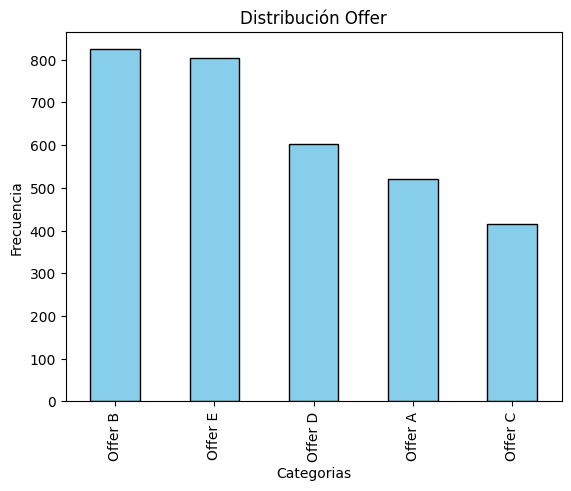

In [11]:
# Se analizan las columnas con datos faltantes

bar_graph(df, 'Offer')

Se observa que existe un desbalance en la frecuencia de las ofertas, por lo que se hace necesario determinar para los datos donde la oferta no es nula, como se comporta contra la ida de los clientes.

In [12]:
# Analisis para datos no faltantes

df_offer_nonan = df[["Offer",'Churn']][df['Offer'].notna()]

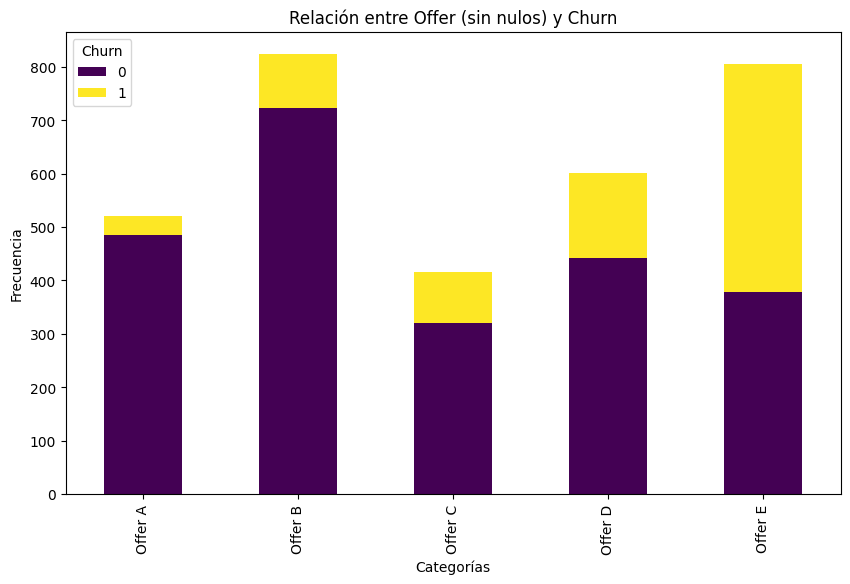

In [13]:
frecuencias_offer = pd.crosstab(df_offer_nonan['Offer'], df_offer_nonan['Churn'])

frecuencias_offer.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relación entre Offer (sin nulos) y Churn')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.legend(title='Churn')
plt.show()

Es interesante observar que existe una mayor proporcion de personas que se marchan en la oferta E, a diferencia de las demás ofertas, sería interesante obtener información de las ofertas para determinar este comportamiento. Aún así, se observa que independiente de si el cliente tiene una oferta o no, se puede marchar por lo que esta columna no debería tenerse en cuenta para calcular si un cliente se va o no

In [14]:
# Analisis para datos faltantes

df_offer_na = df[["Offer",'Churn']][df['Offer'].isna()]

In [15]:
df_offer_na['Churn'].value_counts()

Churn
0    2826
1    1051
Name: count, dtype: int64

En los datos faltantes de las ofertas siguen existiendo proporciones para personas que se marchan o no. En caso de que solo se hubiera presentado la clase 1, podrías identificar que aquellas personas que se marchan podrían ser retenidas si se les hiciera una oferta

**Analisis de la columna churn category**

In [16]:
# Analisis para datos no faltantes

df_churn_category_nonan = df['Churn Category'][df['Churn Category'].notna()]
df_churn_category_nonan.value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

**Analisis de la columna internet type**

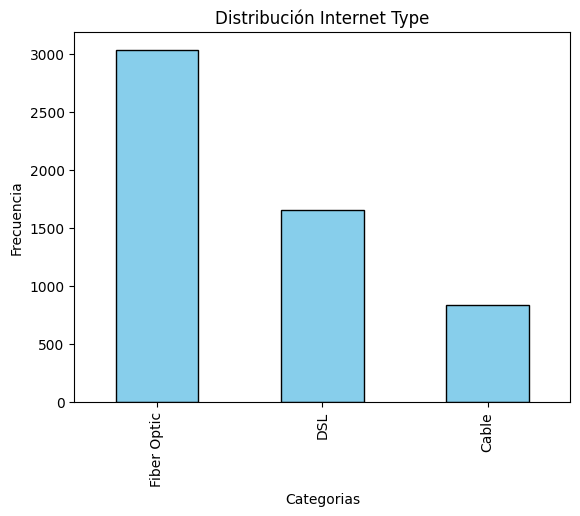

In [17]:
bar_graph(df, 'Internet Type')

In [18]:
# Analisis para datos no faltantes

df_churn_category_nonan = df[['Internet Type','Churn']][df['Internet Type'].notna()]
df_churn_category_nonan.value_counts()

Internet Type  Churn
Fiber Optic    0        1799
DSL            0        1345
Fiber Optic    1        1236
Cable          0         617
DSL            1         307
Cable          1         213
Name: count, dtype: int64

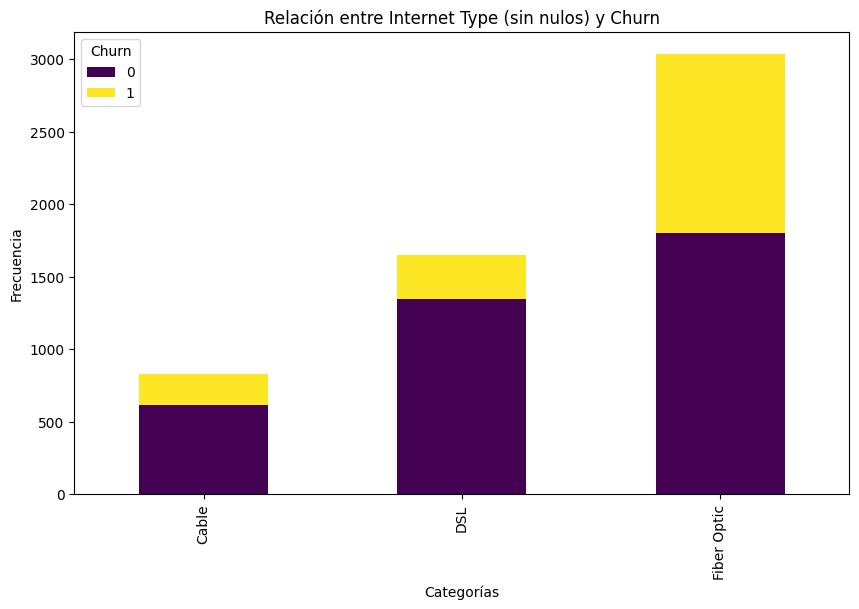

In [19]:
frecuencias_offer = pd.crosstab(df_churn_category_nonan['Internet Type'], df_churn_category_nonan['Churn'])

frecuencias_offer.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relación entre Internet Type (sin nulos) y Churn')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.legend(title='Churn')
plt.show()

In [20]:
# Analisis para datos faltantes

df_internet_type_na = df[["Internet Type",'Churn']][df['Internet Type'].isna()]
df_internet_type_na['Churn'].value_counts()

Churn
0    1413
1     113
Name: count, dtype: int64

## Preprocesamiento

Se eliminan aquellas columnas de offert, churn category y churn reason ya que son variables que no aportan información para determinar si una persona se va o no, en cambio puede ser interesante su uso para determinar porque se van y como retener a los clientes.

In [21]:
df = df.drop(columns=['Offer','Churn Category','Churn Reason','Internet Type'])

## Correlaciones y distribuciones

In [22]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [23]:
print("Medidas descriptivas")
df[numeric_columns].describe()

Medidas descriptivas


,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,20.515405,22.958954,58.505040,4400.295755,0.231010,0.343888,0.783331,36.197455,-119.756684,...,32.386767,2280.381264,6.860713,749.099262,1.962182,3034.379056,0.198921,0.673719,93486.070567,0.265370
std,16.750352,20.418940,15.448113,21.170031,1183.057152,0.421508,0.475038,0.412004,2.468929,2.154425,...,24.542061,2266.220462,25.104978,846.660055,7.902614,2865.204542,0.399217,0.468885,1856.767505,0.441561
min,19.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,...,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,3.000000,9.210000,40.000000,3469.000000,0.000000,0.000000,1.000000,33.990646,-121.788090,...,9.000000,400.150000,0.000000,70.545000,0.000000,605.610000,0.000000,0.000000,92101.000000,0.000000
50%,46.000000,17.000000,22.890000,61.000000,4527.000000,0.000000,0.000000,1.000000,36.205465,-119.595293,...,29.000000,1394.550000,0.000000,401.440000,0.000000,2108.640000,0.000000,1.000000,93518.000000,0.000000
75%,60.000000,27.000000,36.395000,75.500000,5380.500000,0.000000,1.000000,1.000000,38.161321,-117.969795,...,55.000000,3786.600000,0.000000,1191.100000,0.000000,4801.145000,0.000000,1.000000,95329.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,6500.000000,1.000000,1.000000,1.000000,41.962127,-114.192901,...,72.000000,8684.800000,150.000000,3564.720000,49.790000,11979.340000,1.000000,1.000000,96150.000000,1.000000


A partir de observa los datos nacen las siguientes preguntas:

* Analizar si existe correlacion entre aquellos clientes que tienen metodo de pago paperless o no contra su ida o no
* Analizar si el consumo de datos esta relacionado con la ida de los clientes
* Analizar datos demograficos de los usuarios
* Analizar si las personas casadas tienden a tener seguros o amigos
* Analizar la edad con el consumo y la ida

## Analisis de columnas numericas

In [24]:
print("Columnas numericas",numeric_columns)

Columnas numericas Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'CLTV', 'Dependents', 'Device Protection Plan',
       'Internet Service', 'Latitude', 'Longitude', 'Married',
       'Monthly Charge', 'Multiple Lines', 'Number of Dependents',
       'Number of Referrals', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Phone Service', 'Population',
       'Premium Tech Support', 'Referred a Friend', 'Satisfaction Score',
       'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Zip Code', 'Churn'],
      dtype='object')


Al revisar las columnas numericas se observa que algunas columnas tienen la misma informacion de otra columna pero más desglosada, como es el caso de under 30 que tiene la informacion de los pacientes por debajo de 30, cuya informacion se puede obtener de la columna edad, lo mismo sucede para las siguientes:

*  'Churn Score'
*  Latitude
*  Longitude
*  'Dependents'
*  Population
*  'Senior Citizen'
*  'Under 30'

Estas columnas se eliminan

In [25]:
numeric_columns = ['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
      'CLTV', 'Device Protection Plan',
       'Internet Service', 'Married',
       'Monthly Charge', 'Multiple Lines', 'Number of Dependents',
       'Number of Referrals', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Phone Service', 'Population',
       'Premium Tech Support', 'Referred a Friend', 'Satisfaction Score',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Unlimited Data', 'Zip Code', 'Churn']

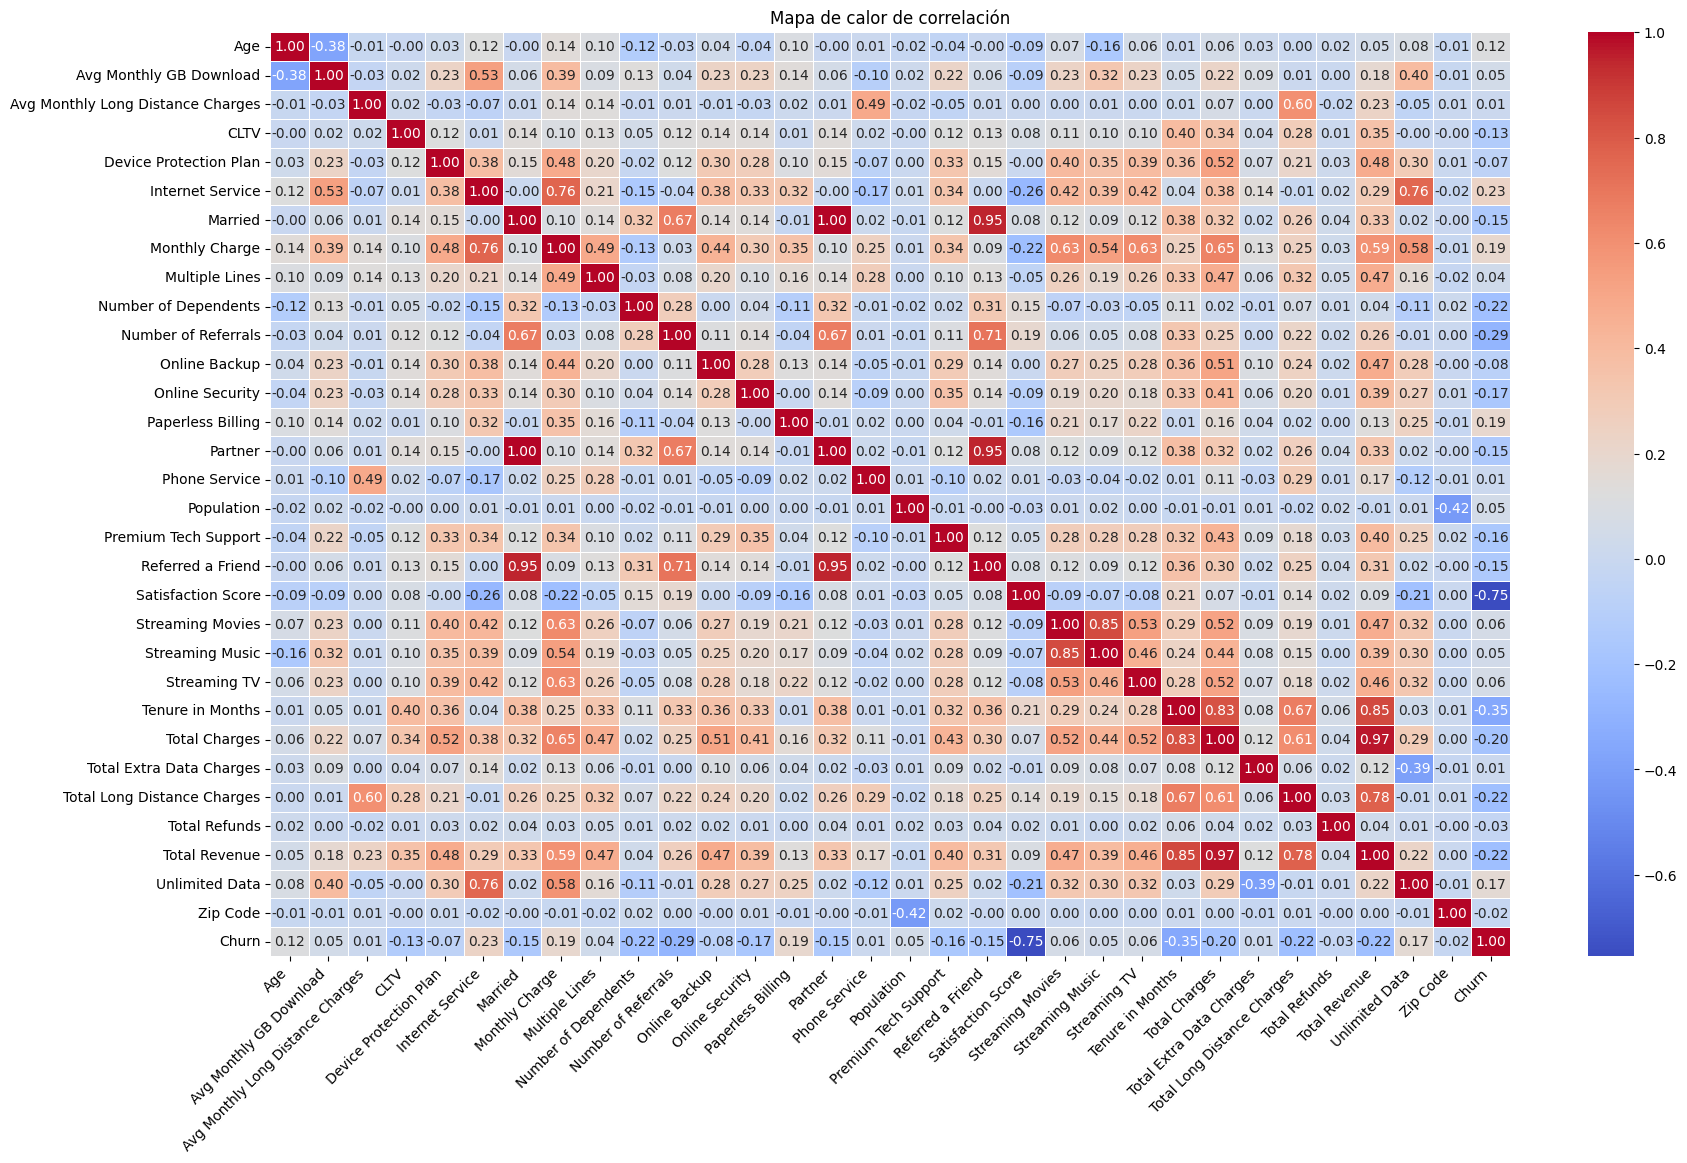

In [26]:
correlation_matrix = df[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')

plt.title("Mapa de calor de correlación")
plt.show()

Se observa que existe una fuerte correlacion entre el puntaje de satisfaction y la probabilidad de que una persona se vaya o se quede. De forma más leve, también se observa que el tiempo que lleva la persona en la compañia es inversamente a la salida, indicando que entre más tiempo más probable es que se vaya la persona. Otras columnas con significancia son el si tiene servicio de internet, el cargo mensual, la forma de pago, el numero de referencias, el cargo total, la ganancia total, y los cargos a larga distancia.

Es así como solo se conservan aquellas columnas con una correlación superior al 20%.

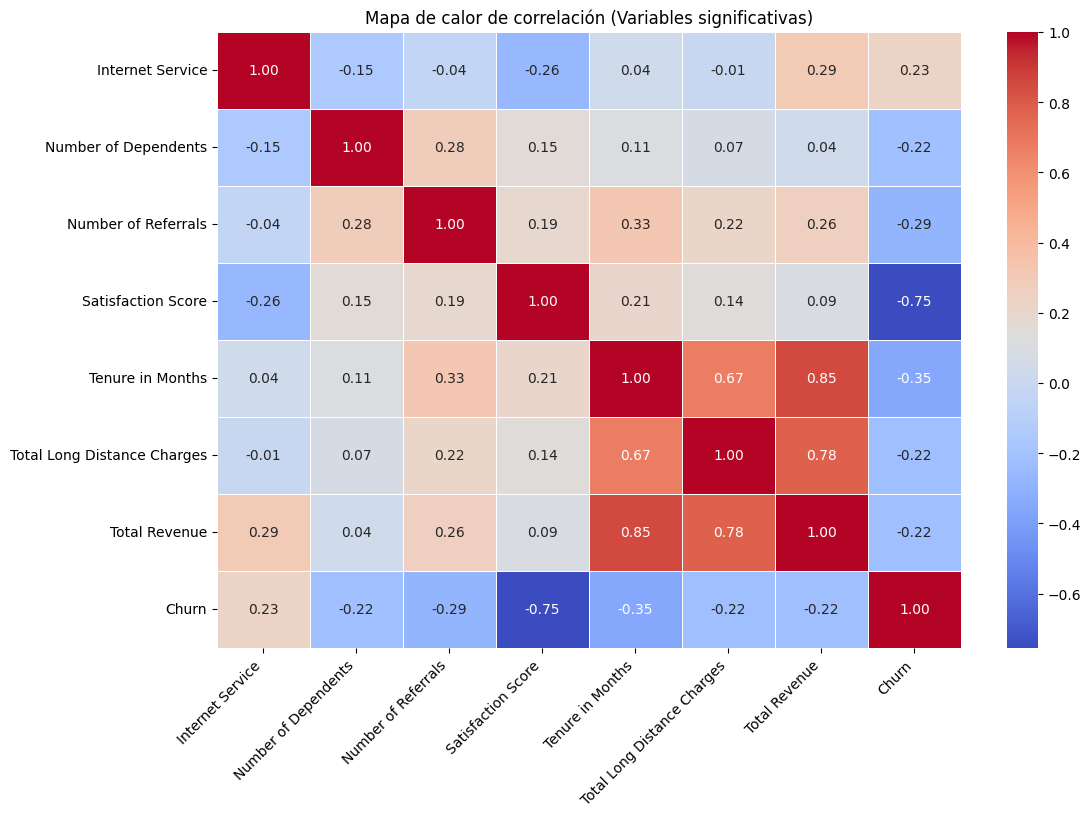

In [27]:
correlation_threshold = 0.2
churn_correlations = correlation_matrix['Churn'][abs(correlation_matrix['Churn']) > correlation_threshold]

significant_number_columns = churn_correlations.index.tolist()

filtered_correlation_matrix = correlation_matrix.loc[significant_number_columns, significant_number_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')

plt.title("Mapa de calor de correlación (Variables significativas)")
plt.show()

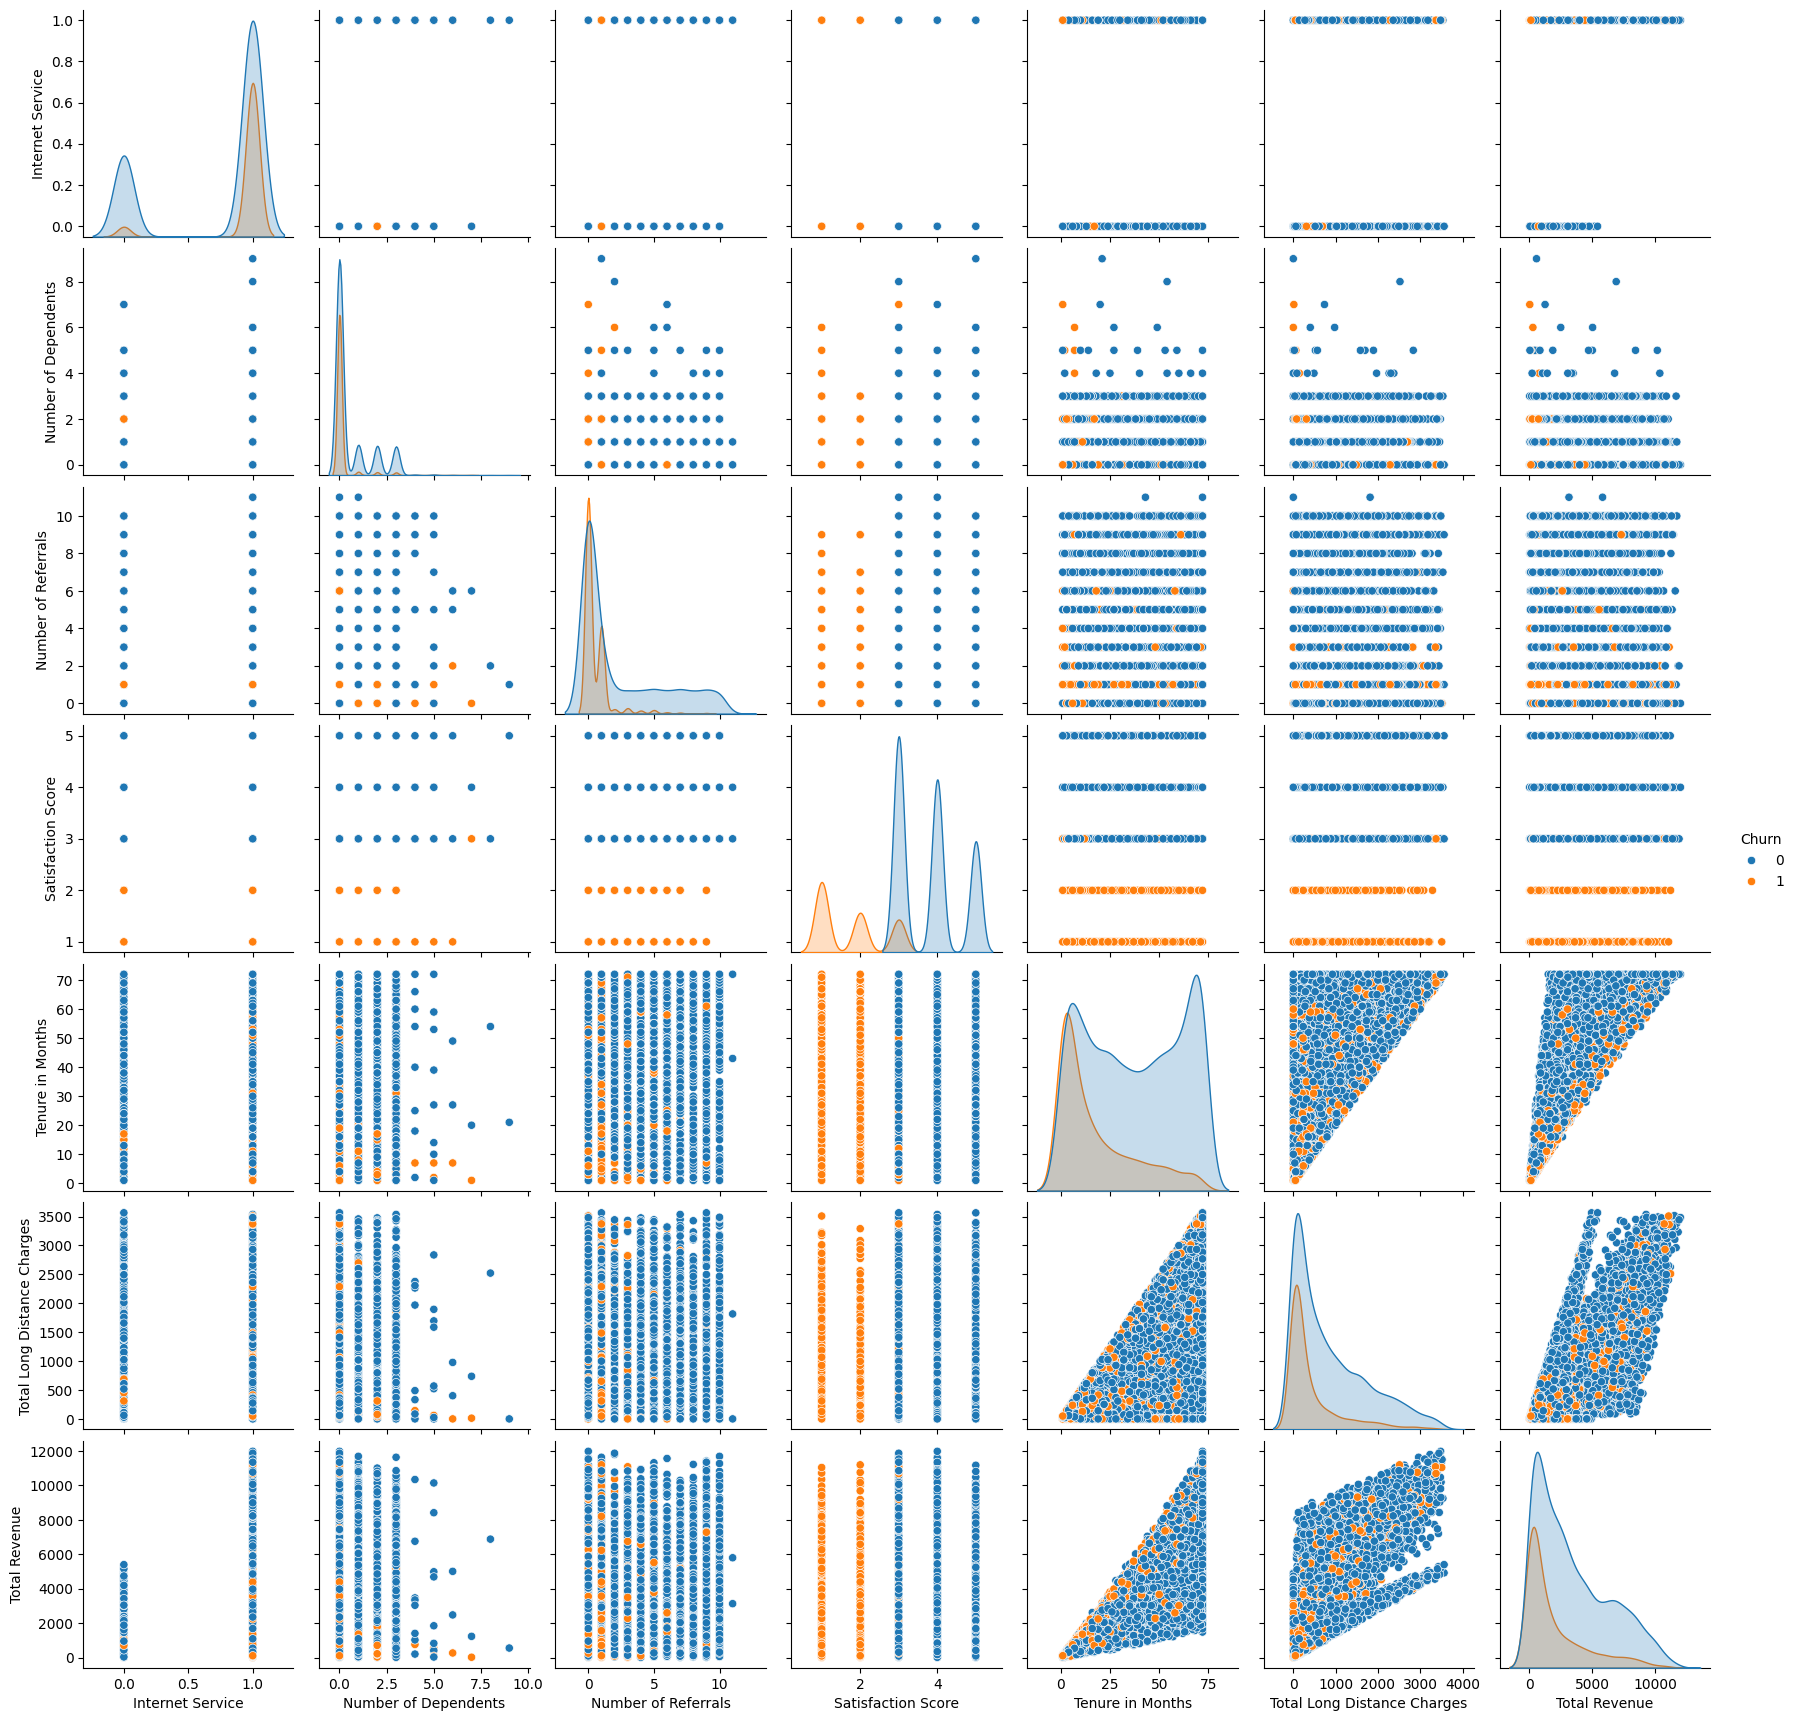

In [28]:
sns.pairplot(df[significant_number_columns], diag_kind='kde', hue='Churn')

Se observa que existe una mayor proporcion de personas que se marchan cuando tiene un servicio de internet contratado. Las demás variables no parecen presentar patrones de interés y donde la variable objetivo se distribuye en los datos, a diferencia de el nivel de satisfaction.

## Analisis de columnas categoricas

In [29]:
len(categorical_columns)

10

In [30]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values} tamano {len(unique_values)}")

Valores únicos en la columna 'City': ['San Mateo' 'Sutter Creek' 'Santa Cruz' ... 'June Lake' 'Chino Hills'
 'Mt Baldy'] tamano 1106
Valores únicos en la columna 'Contract': ['Two Year' 'Month-to-Month' 'One Year'] tamano 3
Valores únicos en la columna 'Country': ['United States'] tamano 1
Valores únicos en la columna 'Customer ID': ['4526-ZJJTM' '5302-BDJNT' '5468-BPMMO' ... '3166-PNEOF' '1821-BUCWY'
 '7566-DSRLQ'] tamano 7043
Valores únicos en la columna 'Customer Status': ['Stayed' 'Churned' 'Joined'] tamano 3
Valores únicos en la columna 'Gender': ['Female' 'Male'] tamano 2
Valores únicos en la columna 'Lat Long': ['37.538309, -122.305109' '38.432145, -120.77069' '37.007882, -122.065975'
 ... '36.833002, -119.82947' '32.787836, -117.232356'
 '32.85723, -117.209770'] tamano 1679
Valores únicos en la columna 'Payment Method': ['Bank Withdrawal' 'Credit Card' 'Mailed Check'] tamano 3
Valores únicos en la columna 'Quarter': ['Q3'] tamano 1
Valores únicos en la columna 'State': ['Califo

Se observa que las columnas de ID customer, State, Quarter, Country no aportan informacion a la clasificacion por lo que se eliminan.

In [31]:
categorical_columns = categorical_columns.drop(['Quarter','State','Customer ID','Country'])

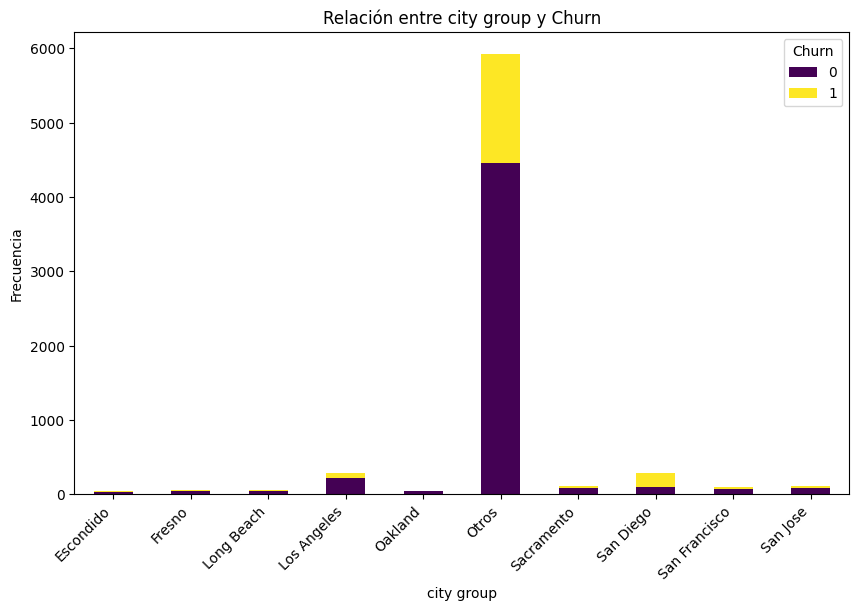

In [32]:
# Se agrupan las ciudades con una cantidad menor a 50
df['City group'] = df['City'].apply(lambda x: x if df['City'].value_counts()[x] >= 50 else 'Otros')

tabla_frecuencia_agrupada = pd.crosstab(df['City group'], df['Churn'])

tabla_frecuencia_agrupada.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relación entre city group y Churn')
plt.xlabel('city group')
plt.ylabel('Frecuencia')
plt.legend(title='Churn')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# Ubicacion geografica de los clientes
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

fig = px.scatter_geo(df,
                        lat=df['Latitude'],
                        lon=df['Longitude'],
                        scope='north america',
                        fitbounds='locations',
                        center={'lat': 37.7749, 'lon': -122.4194},
                        title='Ubicaciones en California',
                        color='Churn',
                        color_discrete_map={0: 'blue', 1: 'red'}
                       )
fig.update_geos(visible=True, resolution=50, showcountries=True, countrycolor="Black",
              showsubunits=True, subunitcolor="Blue")
fig.show()

No se observa que la ciudad entregue informacion adicional sobre la ida o no de un cliente

In [34]:
categorical_columns = categorical_columns.drop(['City','Lat Long'])

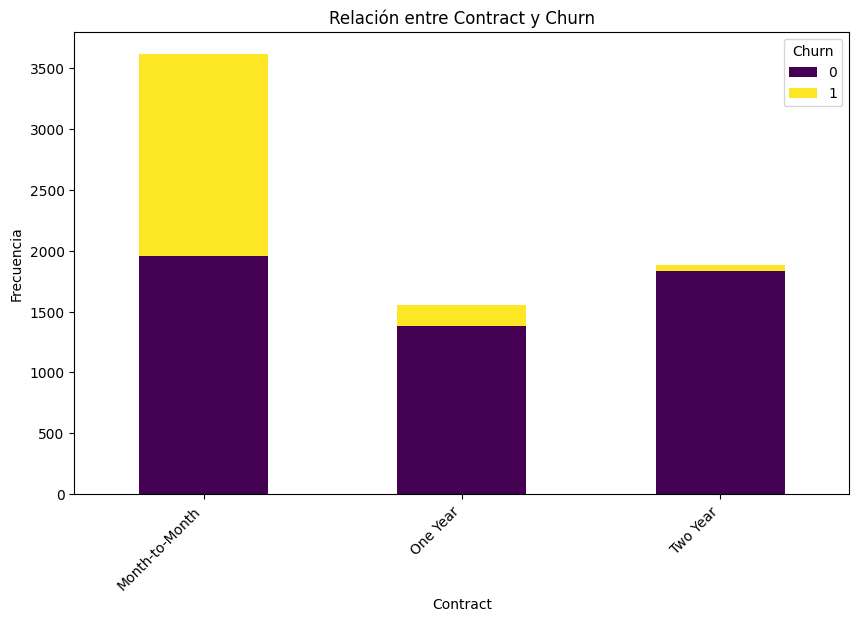

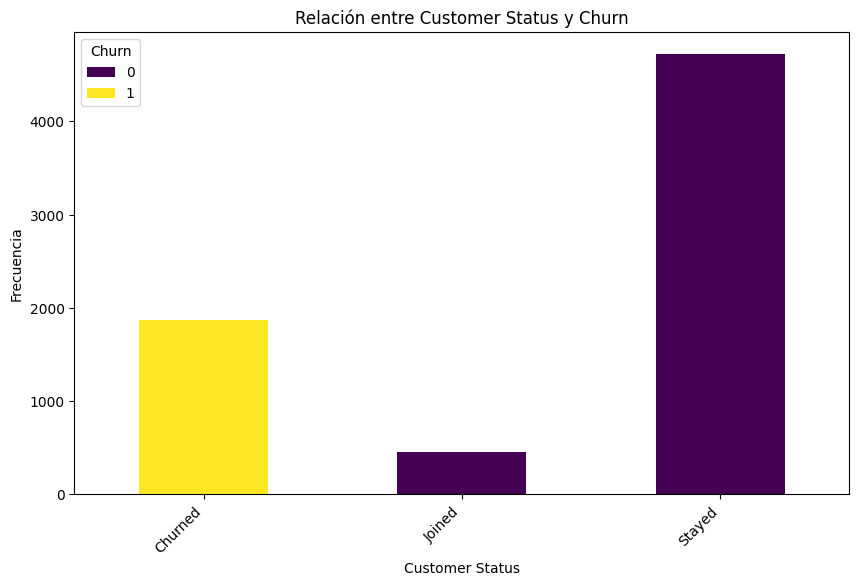

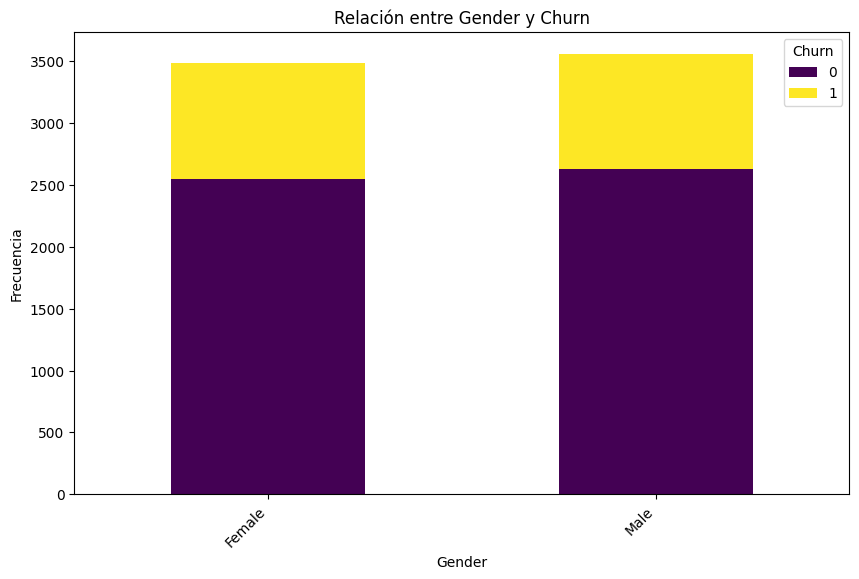

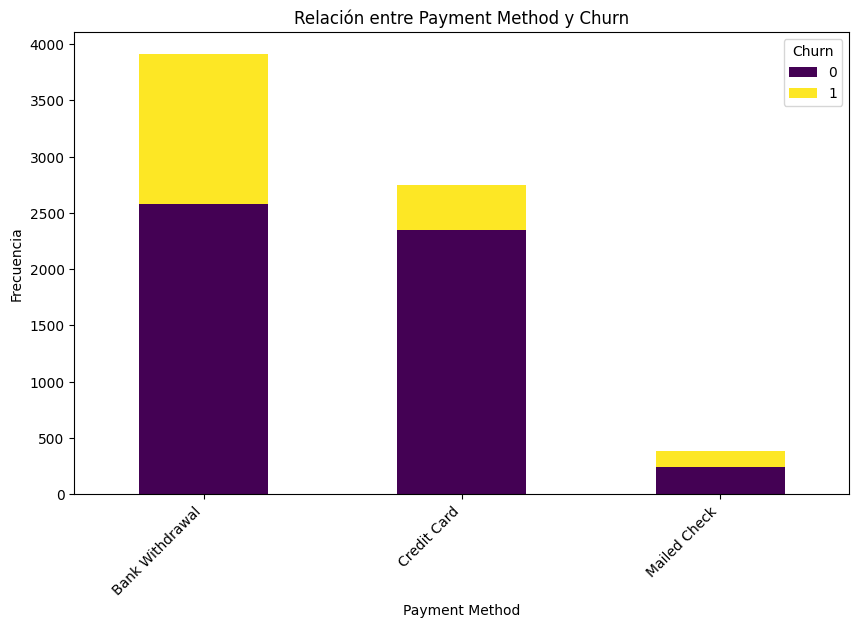

In [35]:
for column in categorical_columns:
  tabla_frecuencia_agrupada = pd.crosstab(df[column], df['Churn'])

  tabla_frecuencia_agrupada.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
  plt.title(f'Relación entre {column} y Churn')
  plt.xlabel(f'{column}')
  plt.ylabel('Frecuencia')
  plt.legend(title='Churn')
  plt.xticks(rotation=45, ha='right')
  plt.show()

Se observa que el tipo de contrato de mes a mes tiene una mayor proporcion de personas que se retiran con casi un 50%. En una misma proporción también se presenta en el método de pago. En el caso del genero, no se presenta una diferencia.

In [36]:
significant_categorical_columns = categorical_columns.drop(['Customer Status','Gender'])

In [37]:
significant_categorical_columns

Index(['Contract', 'Payment Method'], dtype='object')

## Datos para entrenamiento de modelo

In [38]:
significant_columns = list(significant_number_columns) + list(significant_categorical_columns)
df_significant = df[significant_columns]

# Convertimos las columnas categoricas a one hot
df_significant = pd.get_dummies(df_significant, columns=significant_categorical_columns)
df_significant.head()

,Internet Service,Number of Dependents,Number of Referrals,Satisfaction Score,Tenure in Months,Total Long Distance Charges,Total Revenue,Churn,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,0,1,3,25,486.00,2677.15,0,False,False,True,True,False,False
1,1,0,0,3,35,1596.70,5014.90,0,True,False,False,True,False,False
2,0,0,3,5,46,739.22,1590.42,0,True,False,False,True,False,False
3,1,0,3,4,27,0.00,1276.40,0,False,True,False,False,True,False
4,1,0,1,2,58,998.76,4562.56,1,False,True,False,False,True,False


# Preprocesamiento

In [39]:
X = df_significant.drop(columns=['Churn'])
y = df_significant['Churn']

In [40]:
# Division del conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=47
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Entrenamiento de un decision tree

dt_classifier = DecisionTreeClassifier(random_state=42)

# dt_classifier.fit(X_train_scaled, y_train)

# # Predicciones
# y_pred = dt_classifier.predict(X_test_scaled)

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
cv_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Resultados
print(f"Accuracy promedio: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar de accuracy: {np.std(cv_scores):.4f}")

Accuracy promedio: 0.9494
Desviación estándar de accuracy: 0.0041


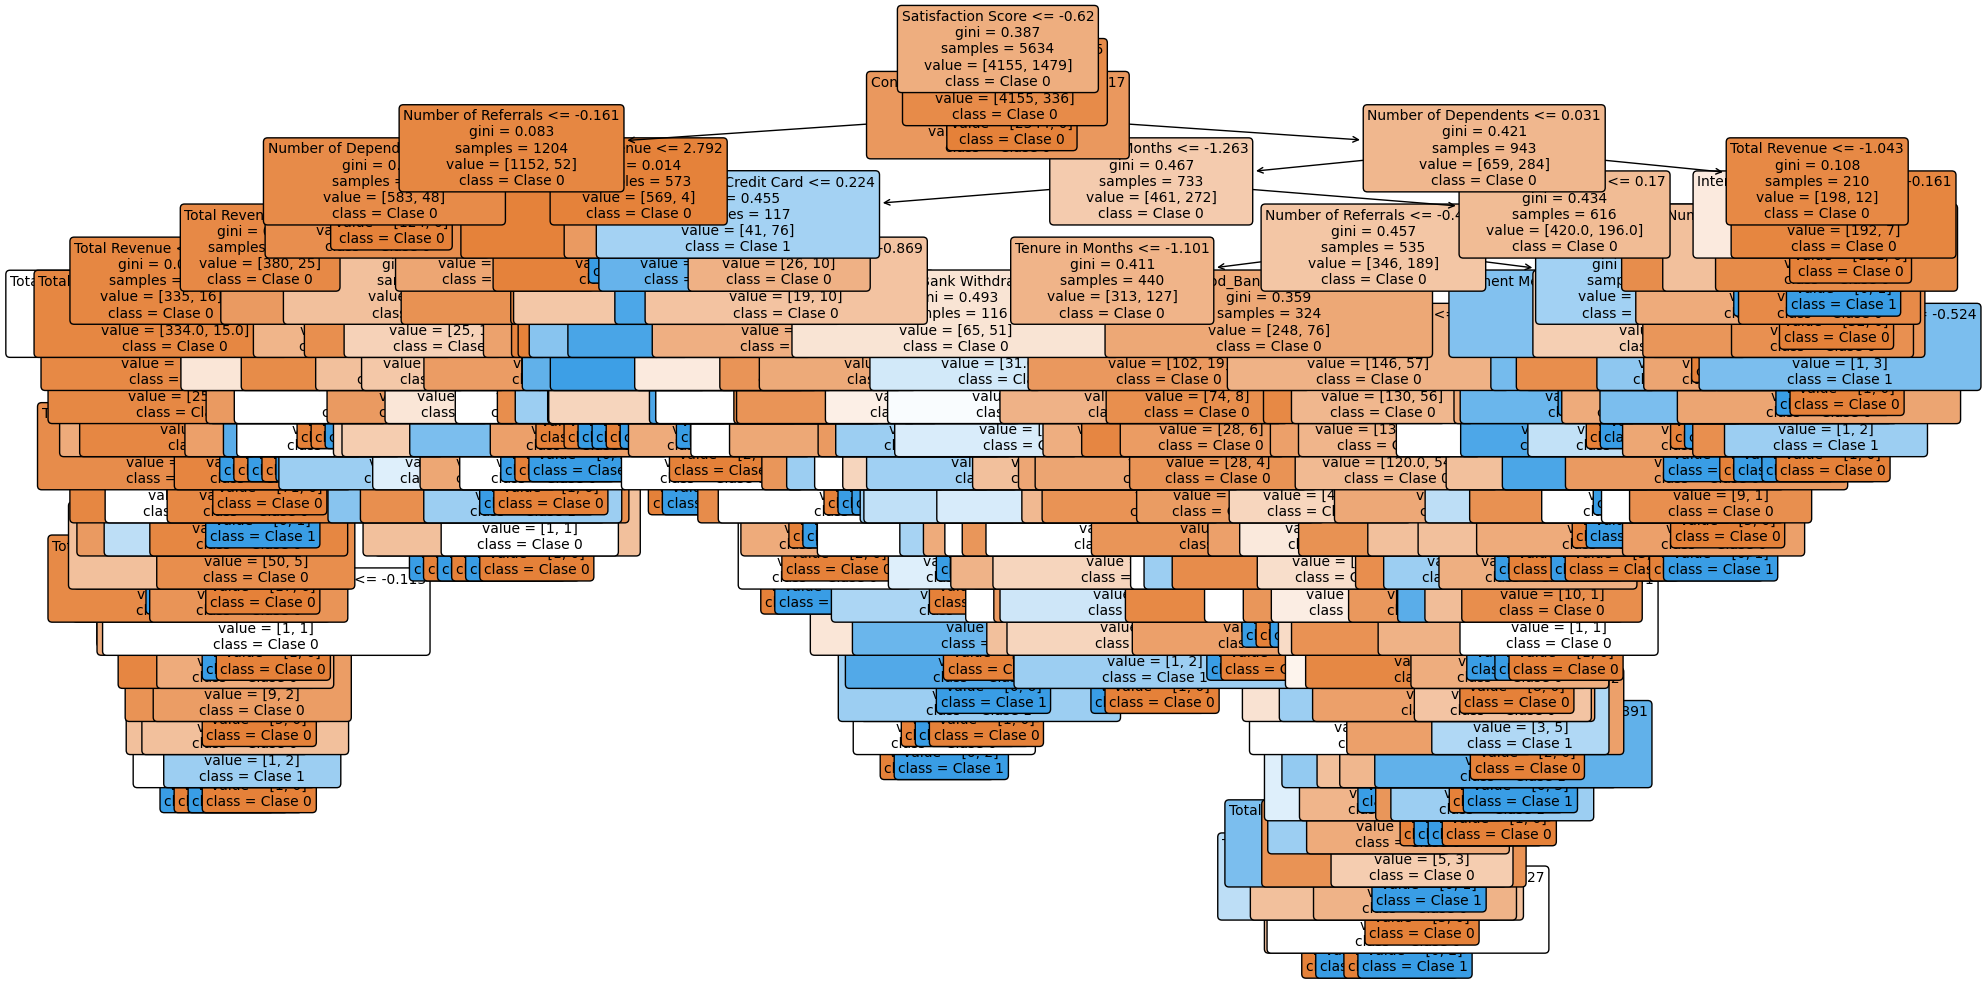

In [125]:
# Visualizar árbol de decisión
plot_decision_tree(
    dt_classifier,
    feature_names=X.columns.tolist(),
    class_names=[f'Clase {c}' for c in sorted(y_train.unique())]
)

In [126]:
# Métricas de rendimiento
print("Métricas de Rendimiento:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Métricas de Rendimiento:
Accuracy: 0.9312
Precision: 0.8845
Recall: 0.8641
F1 Score: 0.8742

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1019
           1       0.88      0.86      0.87       390

    accuracy                           0.93      1409
   macro avg       0.92      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409



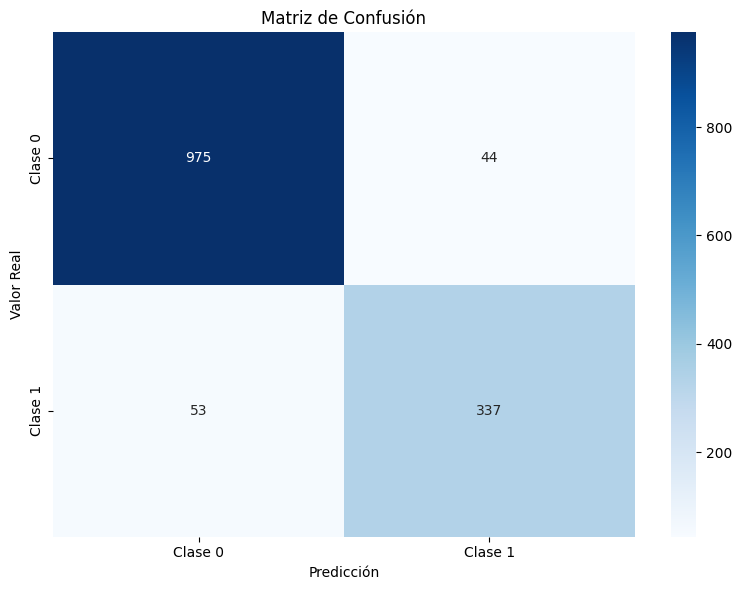

In [127]:
# Visualizar matriz de confusión
plot_confusion_matrix(y_test, y_pred)

In [44]:
# Entrenamiento de un random forest

rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# rfc.fit(X_train_scaled, y_train)

# # Predicciones
# y_pred = rfc.predict(X_test_scaled)

In [129]:
# Métricas de rendimiento
print("Métricas de Rendimiento:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Métricas de Rendimiento:
Accuracy: 0.9482
Precision: 0.9516
Recall: 0.8564
F1 Score: 0.9015

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1019
           1       0.95      0.86      0.90       390

    accuracy                           0.95      1409
   macro avg       0.95      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



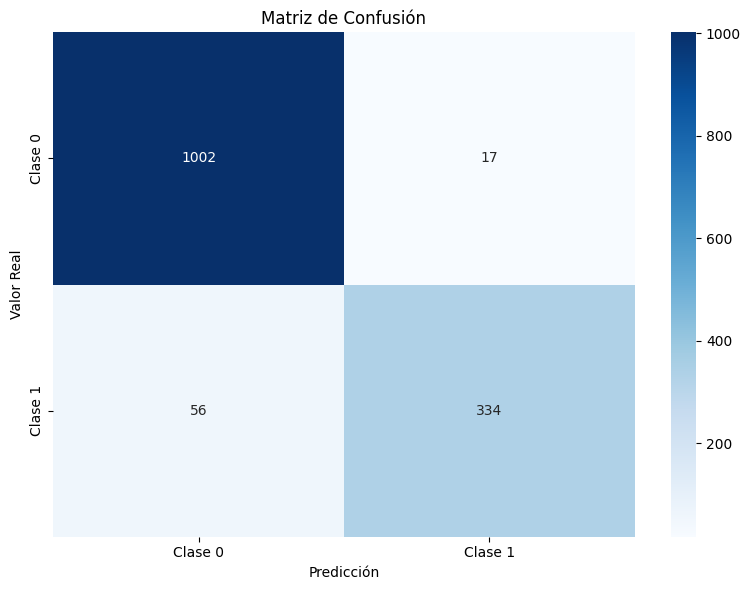

In [130]:
# Visualizar matriz de confusión
plot_confusion_matrix(y_test, y_pred)

In [131]:
# Entrenameinto de un svm
svc = SVC(kernel='rbf', random_state=42)

svc.fit(X_train_scaled, y_train)

# Predicciones
y_pred = svc.predict(X_test_scaled)

In [132]:
#Métricas de rendimiento
print("Métricas de Rendimiento:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Métricas de Rendimiento:
Accuracy: 0.9454
Precision: 0.9335
Recall: 0.8641
F1 Score: 0.8975

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1019
           1       0.93      0.86      0.90       390

    accuracy                           0.95      1409
   macro avg       0.94      0.92      0.93      1409
weighted avg       0.95      0.95      0.94      1409



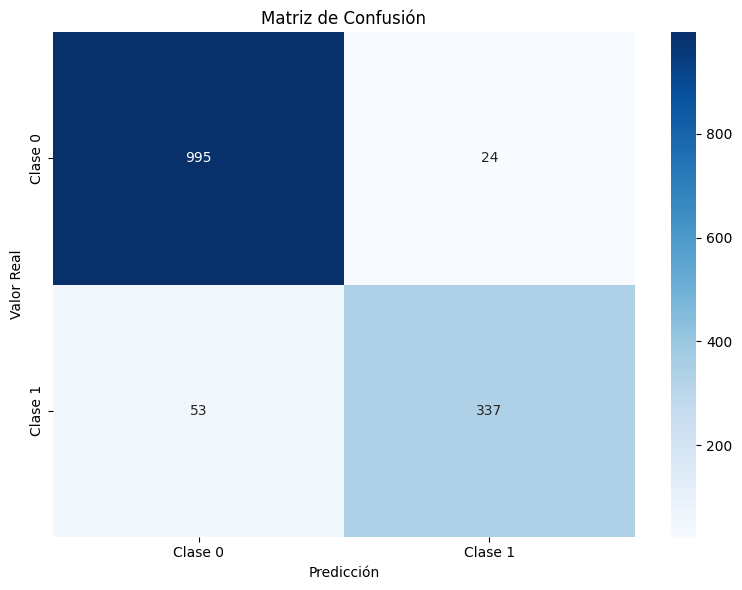

In [133]:
# Visualizar matriz de confusión
plot_confusion_matrix(y_test, y_pred)

In [134]:
# Entrenamiento de un KNN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn.predict(X_test_scaled)

In [135]:
#Métricas de rendimiento
print("Métricas de Rendimiento:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Métricas de Rendimiento:
Accuracy: 0.9432
Precision: 0.9354
Recall: 0.8538
F1 Score: 0.8928

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1019
           1       0.94      0.85      0.89       390

    accuracy                           0.94      1409
   macro avg       0.94      0.92      0.93      1409
weighted avg       0.94      0.94      0.94      1409



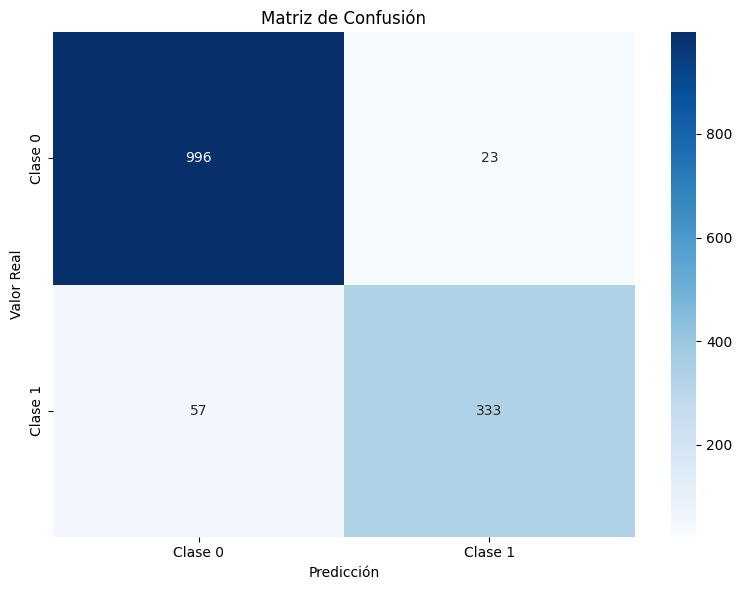

In [136]:
# Visualizar matriz de confusión
plot_confusion_matrix(y_test, y_pred)

## Tuneo

Se realiza un tuneo de hiperparametros para el mejor modelo que fue randomforest

In [140]:
# Modelo
rfc = RandomForestClassifier(random_state=42)

# grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

# Modelo con los mejores hiperparámetros
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test_scaled)

# Métricas de rendimiento
print("Métricas de Rendimiento:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Métricas de Rendimiento:
Accuracy: 0.9475


In [141]:
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precision: 0.9702
Recall: 0.8359
F1 Score: 0.8981

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1019
           1       0.97      0.84      0.90       390

    accuracy                           0.95      1409
   macro avg       0.96      0.91      0.93      1409
weighted avg       0.95      0.95      0.95      1409



# Guardar mejor modelo

In [160]:

dump(df_significant.columns, 'significant_columns.pkl')

dump(scaler, 'scaler.pkl')

dump(grid_search.best_estimator_, 'best_random_forest_model.joblib')


['best_random_forest_model.joblib']

# Cargar modelo de inferencia

In [ ]:
new_data_json = {
'Internet Service':1,
 'Number of Dependents':0,
 'Number of Referrals':1,
 'Satisfaction Score':3,
 'Tenure in Months':25,
 'Total Long Distance Charges':486.00,
 'Total Revenue':2677.15,
 'Contract':'Two Year',
 'Payment Method':'Mailed Check'
}

def convert_one_hot(data, options):
    output = []
    for o in options:
        if data == o:
            output.append(1)
        else:
            output.append(0)

    return output 

def preprocess(new_data_json, significant_columns):
    internet_service = new_data_json['Internet Service']
    number_dependents = new_data_json['Number of Dependents']
    number_referrals = new_data_json['Number of Referrals']
    satisfaction_score = new_data_json['Satisfaction Score']
    tenure_in_months = new_data_json['Tenure in Months']
    total_long_distance_charges = new_data_json['Total Long Distance Charges']
    total_revenue = new_data_json['Total Revenue']
    contract = new_data_json['Contract']
    payment_method = new_data_json['Payment Method']

    x = [internet_service, number_dependents, number_referrals, satisfaction_score, tenure_in_months, total_long_distance_charges, total_revenue]

    contract = convert_one_hot(contract, ['Month-to-Month','One Year', 'Two Year'])
    payment_method = convert_one_hot(payment_method, ['Bank Withdrawal','Credit Card','Mailed Check'])

    x += contract + payment_method
    df_x = pd.DataFrame([x], columns=significant_columns)
    return df_x

significant_columns = joblib.load('significant_columns.pkl')
scaler = joblib.load('scaler.pkl')
model = joblib.load('best_random_forest_model.joblib')

significant_columns = significant_columns.drop(['Churn'])

x = preprocess(new_data_json, significant_columns)
x_scaled = scaler.transform(x)

prediction = model.predict(x_scaled)

pred = prediction[0]

if pred == 1:
    'Se va'
else:
    'No se va'

np.int64(0)